In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import re

Ploting the BH curves

First, lamination direction

In [15]:
with open('BH_DL_3_data.dat', 'r') as f:
    BH_DL = f.read()

pattern1 = '\n' # line break pattern used to delimit values
pattern2 = ' ' # space pattern used to delimit values

iter1_values = re.finditer(pattern1, BH_DL)

ini_str = 0

idx_bh_dl = 0

B_DL = np.zeros((len(re.findall(pattern2, BH_DL)),),float)
H_DL = np.zeros((len(re.findall(pattern2, BH_DL)),),float)

for iter1_val in iter1_values:
        end_str = iter1_val.start()

        bh_str = str(BH_DL[ini_str:end_str])
        
        B_DL[idx_bh_dl] = float(bh_str.split(pattern2)[0])
        H_DL[idx_bh_dl] = float(bh_str.split(pattern2)[1])
                
        ini_str = iter1_val.end()
        idx_bh_dl += 1

end_str = len(BH_DL)
bh_str = str(BH_DL[ini_str:end_str])

B_DL[idx_bh_dl] = float(bh_str.split(pattern2)[0])
H_DL[idx_bh_dl] = float(bh_str.split(pattern2)[1])


Second, transversal direction

In [16]:
with open('BH_DT_3_data.dat', 'r') as f:
    BH_DT = f.read()

pattern1 = '\n' # line break pattern used to delimit values
pattern2 = ' ' # space pattern used to delimit values

iter1_values = re.finditer(pattern1, BH_DT)

ini_str = 0

idx_bh_dl = 0

B_DT = np.zeros((len(re.findall(pattern2, BH_DT)),),float)
H_DT = np.zeros((len(re.findall(pattern2, BH_DT)),),float)

for iter1_val in iter1_values:
        end_str = iter1_val.start()

        bh_str = str(BH_DT[ini_str:end_str])
        
        B_DT[idx_bh_dl] = float(bh_str.split(pattern2)[0])
        H_DT[idx_bh_dl] = float(bh_str.split(pattern2)[1])
                
        ini_str = iter1_val.end()
        idx_bh_dl += 1

end_str = len(BH_DT)
bh_str = str(BH_DT[ini_str:end_str])

B_DT[idx_bh_dl] = float(bh_str.split(pattern2)[0])
H_DT[idx_bh_dl] = float(bh_str.split(pattern2)[1])

Now, ploting these curves for vizualization

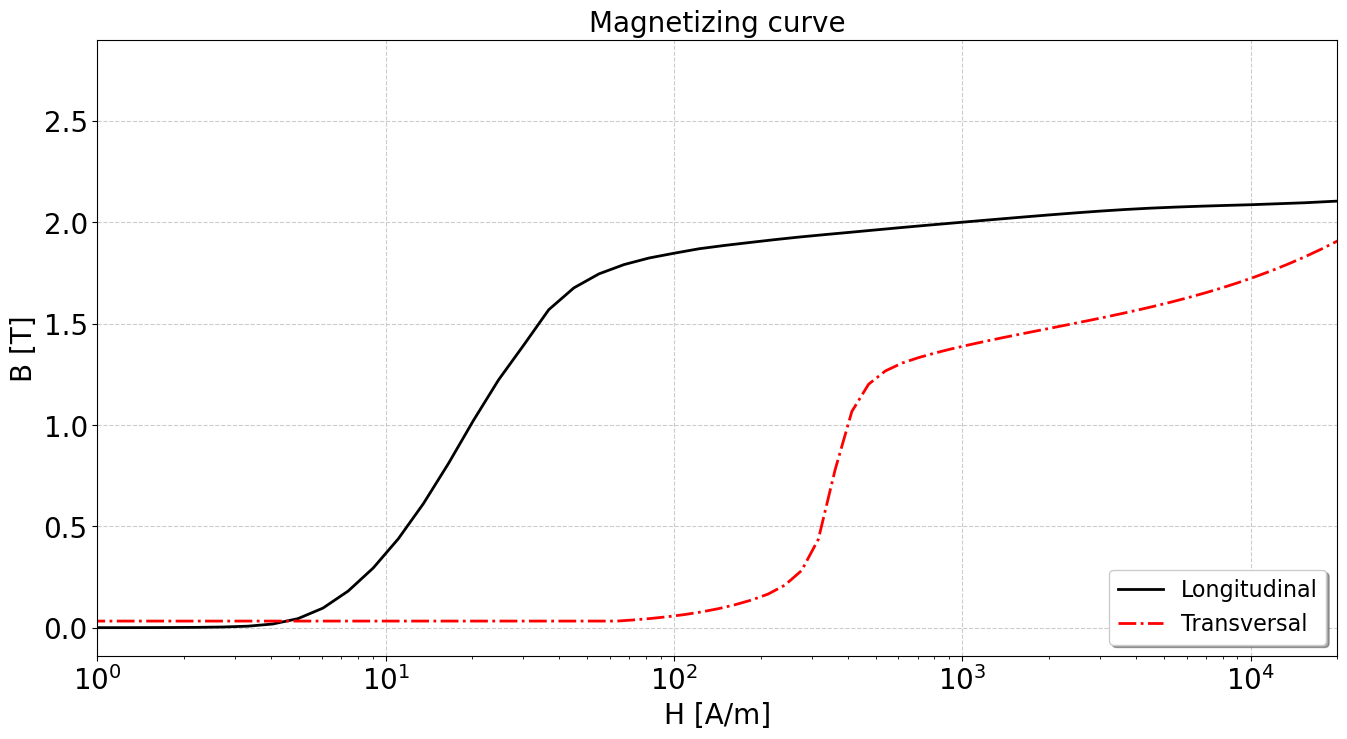

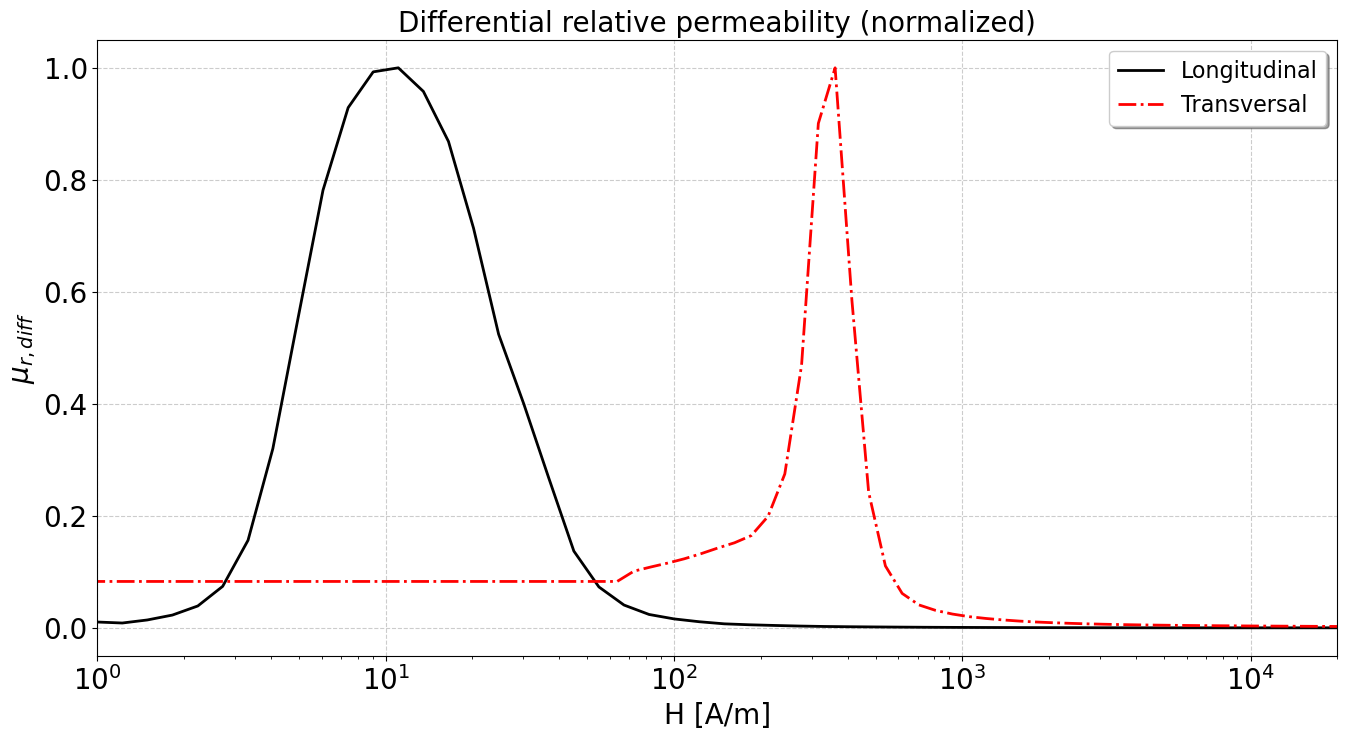

In [17]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.semilogx(H_DL, B_DL, c='k', ls='-', lw=2, label='Longitudinal')
ax.semilogx(H_DT, B_DT, c='r', ls='-.', lw=2, label='Transversal')
ax.set_title('Magnetizing curve', fontsize = 20)
ax.set_ylabel('B [T]', fontsize = 20)
ax.set_xlabel('H [A/m]', fontsize = 20)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.grid(color=(0.8, 0.8, 0.8), linestyle='--', linewidth=.8)
ax.set_xlim([1,20e3])
ax.legend(fontsize = 16, loc = 'lower right', fancybox=True, shadow=True)


u0 = 4*np.pi*1e-7
diff_mu_DL = np.gradient(B_DL)/np.gradient(H_DL)/u0
diff_mu_DT = np.gradient(B_DT)/np.gradient(H_DT)/u0

fig, ax = plt.subplots(figsize=(16, 8))
ax.semilogx(H_DL, diff_mu_DL/max(diff_mu_DL), c='k', ls='-', lw=2, label='Longitudinal')
ax.semilogx(H_DT, diff_mu_DT/max(diff_mu_DT), c='r', ls='-.', lw=2, label='Transversal')
ax.set_title('Differential relative permeability (normalized)', fontsize = 20)
ax.set_ylabel('$\mu_{r,diff}$', fontsize = 20)
ax.set_xlabel('H [A/m]', fontsize = 20)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.grid(color=(0.8, 0.8, 0.8), linestyle='--', linewidth=.8)
ax.set_xlim([1,20e3])
ax.legend(fontsize = 16, loc = 'upper right', fancybox=True, shadow=True)

Now, comparing the results from Elmer FEM against those from a commercial software

In [18]:
# == Isotropic results: ==
m_i_data_nlin = pd.read_csv('../Output_Commercial/Iso_nLin_bh2_WindingPlot_v22cos_Ld.csv')

m_i_time = np.array(m_i_data_nlin[m_i_data_nlin.keys()[0]])*1e-3
m_i_priV = np.array(m_i_data_nlin[m_i_data_nlin.keys()[1]])
m_i_secV = np.array(m_i_data_nlin[m_i_data_nlin.keys()[2]])
m_i_priI = np.array(m_i_data_nlin[m_i_data_nlin.keys()[3]])*1e-3

m_i_loss_nlin = pd.read_csv('../Output_Commercial/Iso_nLin_bh2_LossPlot_v22cos_Ld.csv')

m_i_loss_time = np.array(m_i_loss_nlin[m_i_loss_nlin.keys()[0]])*1e-3
m_i_loss = np.array(m_i_loss_nlin[m_i_loss_nlin.keys()[1]])*1e-3 # mW

m_i_Loss1 = np.mean(m_i_loss[0:50])
m_i_Loss2 = np.mean(m_i_loss[51:100])

# == Anisotropic results: ==
m_a_data_nlin = pd.read_csv('../Output_Commercial/Aniso_nLin_bh2_WindingPlot_v22cos_Ld.csv')

m_a_time = np.array(m_a_data_nlin[m_a_data_nlin.keys()[0]])*1e-3
m_a_priV = np.array(m_a_data_nlin[m_a_data_nlin.keys()[1]])
m_a_secV = np.array(m_a_data_nlin[m_a_data_nlin.keys()[2]])
m_a_priI = np.array(m_a_data_nlin[m_a_data_nlin.keys()[3]])*1e-3

m_a_loss_nlin = pd.read_csv('../Output_Commercial/Aniso_nLin_bh2_LossPlot_v22cos_Ld.csv')

m_a_loss_time = np.array(m_a_loss_nlin[m_a_loss_nlin.keys()[0]])*1e-3
m_a_loss = np.array(m_a_loss_nlin[m_a_loss_nlin.keys()[1]])*1e-3 # mW

m_a_Loss1 = np.mean(m_a_loss[0:50])
m_a_Loss2 = np.mean(m_a_loss[51:100])

In [19]:
# == Isotropic results: ==
with open('res_3d_T5_nLin_iso/res_3d_t_ld.dat.0', 'r') as f:
        res_file = f.read()

pattern1 = '   ' # space patter used to delimit values
pattern2 = '  ' # space patter used to delimit values
new_pattern = ' '

# There are different patterns, easier to convert them to a single space
res_file = re.sub(pattern1, new_pattern, res_file)
res_file = re.sub(pattern2, new_pattern, res_file)

iter_values = re.finditer(new_pattern, res_file)

idx_value = 0

# initializing variables
out_data = np.empty((21,0),float)
values = np.zeros((21,),float)

idx_value = 0
count = 0

ini_str = next(iter_values).end()

for iter_val in iter_values:
        end_str = iter_val.start()
        values[idx_value] = float(res_file[ini_str:end_str])

        idx_value += 1
        ini_str = iter_val.end()

        if idx_value == 21:
                # print(count)
                count += 1
                out_data = np.append(out_data, values.reshape(21,1), axis=1)
                # print(values[7])
                idx_value = 0

count += 1
out_data = np.append(out_data, values.reshape(21,1), axis=1)    

# 8 -> v_is / 16 -> v_r

e_i_time = out_data[4,:]
e_i_priV = out_data[10,:]
e_i_secV = out_data[18,:]
e_i_priI = out_data[5,:]

e_i_Loss1 = out_data[0][50]
e_i_Loss2 = out_data[0][99]

In [20]:
# == Anisotropic results: ==
with open('res_3d_T5_nLin/res_3d_t_ld.dat.0', 'r') as f:
        res_file = f.read()

pattern1 = '   ' # space patter used to delimit values
pattern2 = '  ' # space patter used to delimit values
new_pattern = ' '

# There are different patterns, easier to convert them to a single space
res_file = re.sub(pattern1, new_pattern, res_file)
res_file = re.sub(pattern2, new_pattern, res_file)

iter_values = re.finditer(new_pattern, res_file)

idx_value = 0

# initializing variables
out_data = np.empty((21,0),float)
values = np.zeros((21,),float)

idx_value = 0
count = 0

ini_str = next(iter_values).end()

for iter_val in iter_values:
        end_str = iter_val.start()
        values[idx_value] = float(res_file[ini_str:end_str])

        idx_value += 1
        ini_str = iter_val.end()

        if idx_value == 21:
                # print(count)
                count += 1
                out_data = np.append(out_data, values.reshape(21,1), axis=1)
                # print(values[7])
                idx_value = 0

count += 1
out_data = np.append(out_data, values.reshape(21,1), axis=1)               

# 8 -> v_is / 16 -> v_r

e_a_time = out_data[4,:]
e_a_priV = out_data[10,:]
e_a_secV = out_data[18,:]
e_a_priI = out_data[5,:]

e_a_Loss1 = out_data[0][50]
e_a_Loss2 = out_data[0][99]

(0.0, 0.03333333333333333)

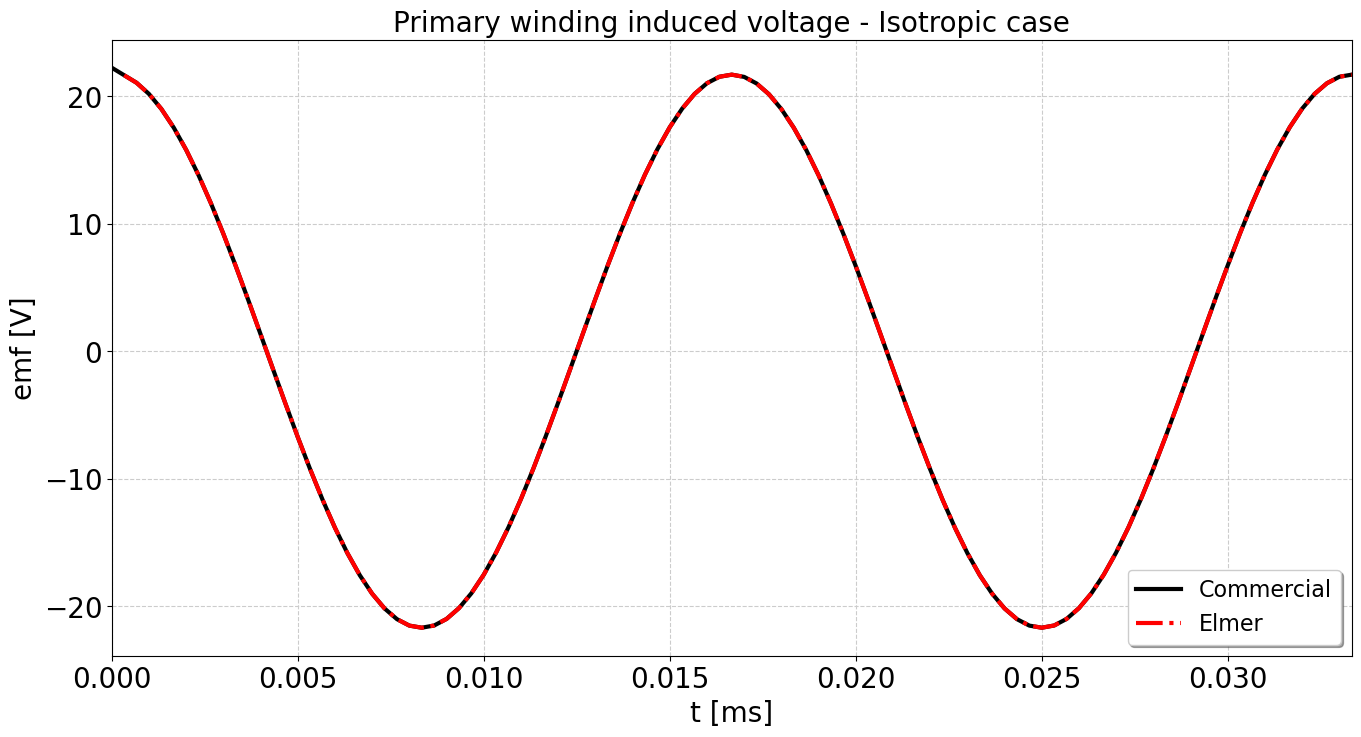

In [21]:
fig, ax = plt.subplots(figsize=(16, 8))
plt.plot(m_i_time, m_i_priV, c='k', ls='-', lw=3, label='Commercial')
plt.plot(e_i_time, e_i_priV, c='r', ls='-.', lw=3, label='Elmer')
ax.set_title('Primary winding induced voltage - Isotropic case', fontsize = 20)
ax.set_ylabel('emf [V]', fontsize = 20)
ax.set_xlabel('t [ms]', fontsize = 20)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.grid(color=(0.8, 0.8, 0.8), linestyle='--', linewidth=.8)
ax.legend(fontsize = 16, loc = 'lower right', fancybox=True, shadow=True)
ax.set_xlim([0,2/60])


(0.0, 0.03333333333333333)

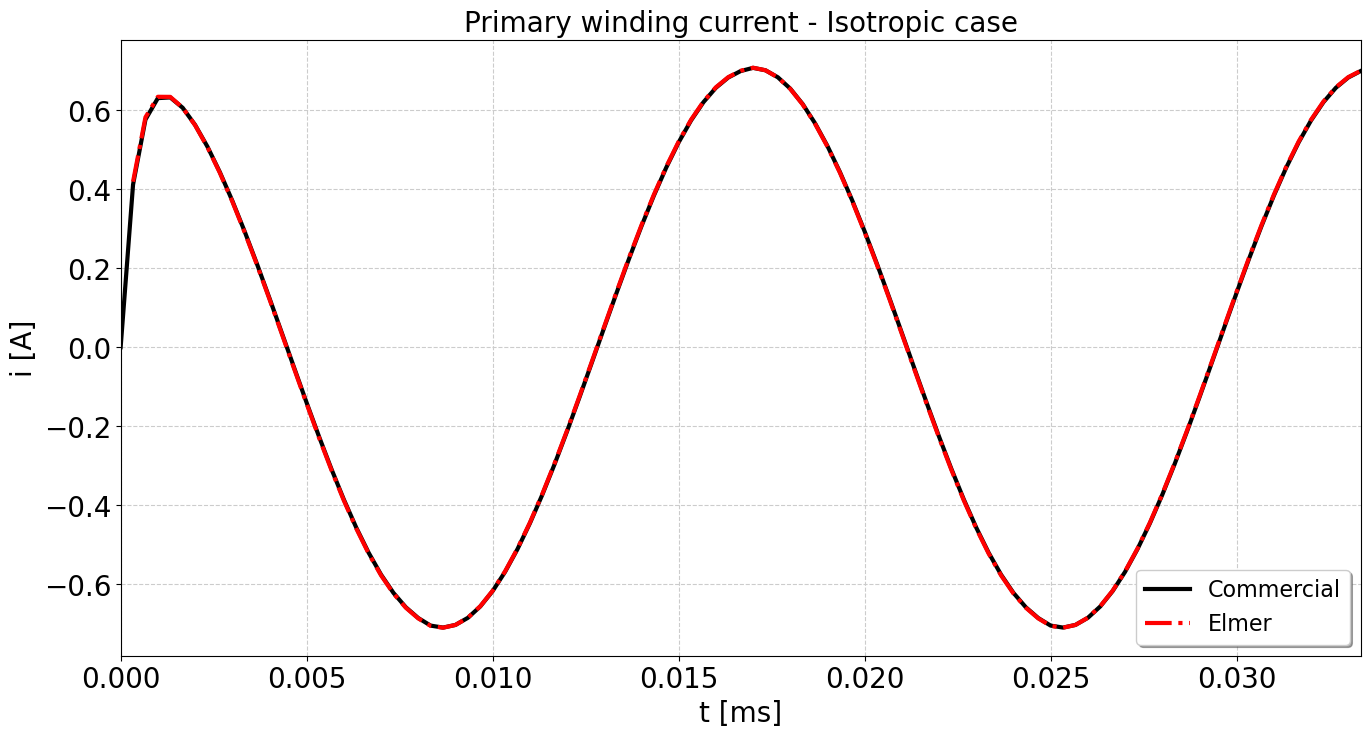

In [22]:
fig, ax = plt.subplots(figsize=(16, 8))
plt.plot(m_i_time, m_i_priI, c='k', ls='-', lw=3, label='Commercial')
plt.plot(e_i_time, e_i_priI, c='r', ls='-.', lw=3, label='Elmer')
ax.set_title('Primary winding current - Isotropic case', fontsize = 20)
ax.set_ylabel('i [A]', fontsize = 20)
ax.set_xlabel('t [ms]', fontsize = 20)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.grid(color=(0.8, 0.8, 0.8), linestyle='--', linewidth=.8)
ax.legend(fontsize = 16, loc = 'lower right', fancybox=True, shadow=True)
ax.set_xlim([0,2/60])


(0.0, 0.03333333333333333)

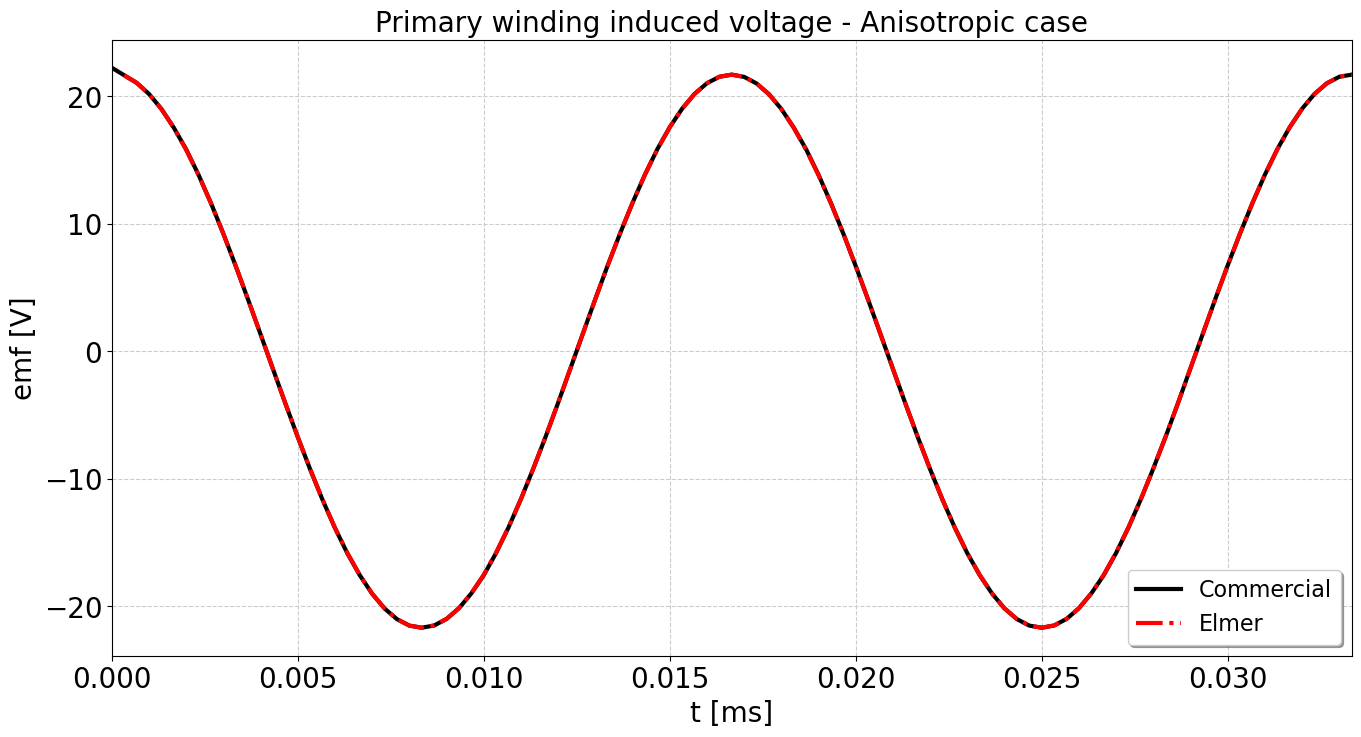

In [23]:
fig, ax = plt.subplots(figsize=(16, 8))
plt.plot(m_a_time, m_a_priV, c='k', ls='-', lw=3, label='Commercial')
plt.plot(e_a_time, e_a_priV, c='r', ls='-.', lw=3, label='Elmer')
ax.set_title('Primary winding induced voltage - Anisotropic case', fontsize = 20)
ax.set_ylabel('emf [V]', fontsize = 20)
ax.set_xlabel('t [ms]', fontsize = 20)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.grid(color=(0.8, 0.8, 0.8), linestyle='--', linewidth=.8)
ax.legend(fontsize = 16, loc = 'lower right', fancybox=True, shadow=True)
ax.set_xlim([0,2/60])


(0.0, 0.03333333333333333)

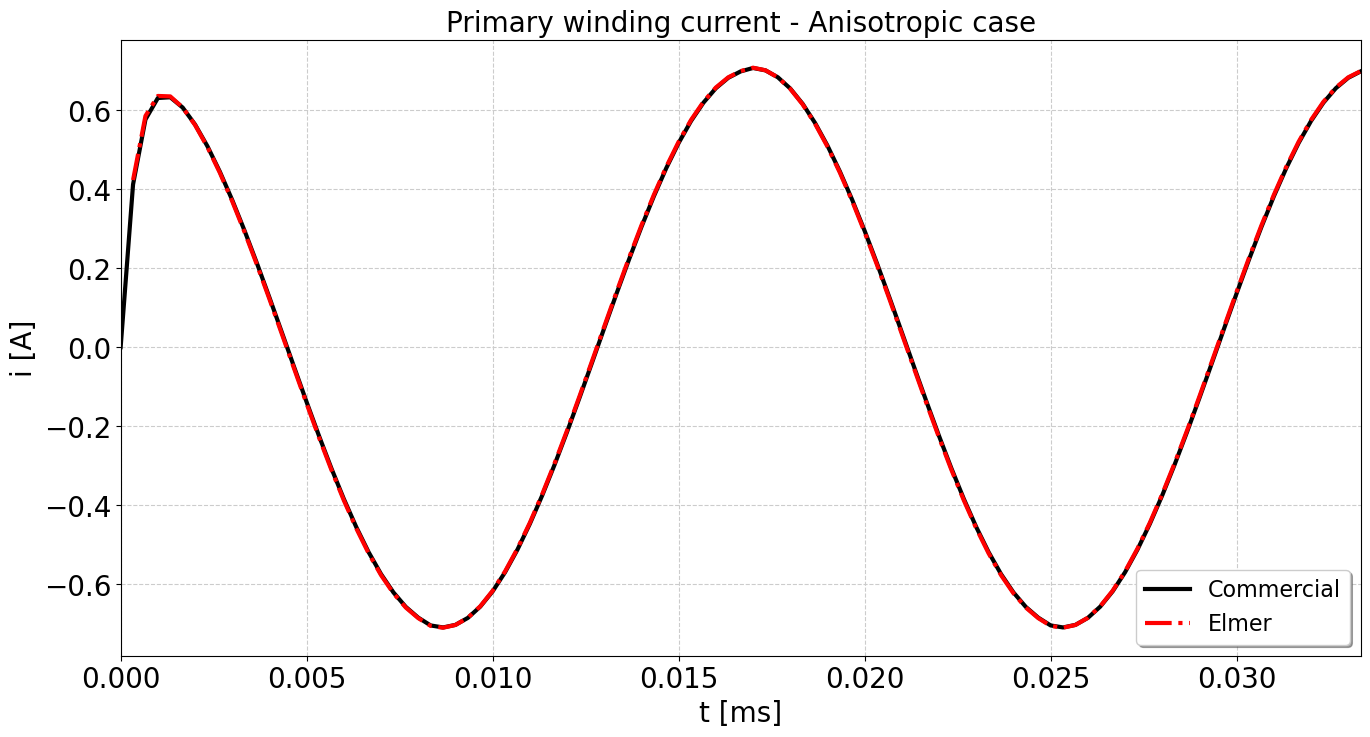

In [24]:
fig, ax = plt.subplots(figsize=(16, 8))
plt.plot(m_a_time, m_a_priI, c='k', ls='-', lw=3, label='Commercial')
plt.plot(e_a_time, e_a_priI, c='r', ls='-.', lw=3, label='Elmer')
ax.set_title('Primary winding current - Anisotropic case', fontsize = 20)
ax.set_ylabel('i [A]', fontsize = 20)
ax.set_xlabel('t [ms]', fontsize = 20)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.grid(color=(0.8, 0.8, 0.8), linestyle='--', linewidth=.8)
ax.legend(fontsize = 16, loc = 'lower right', fancybox=True, shadow=True)
ax.set_xlim([0,2/60])

[0.02913428079375687, 0.08739302756303093]
[0.09313260518493, 0.09347015606521]


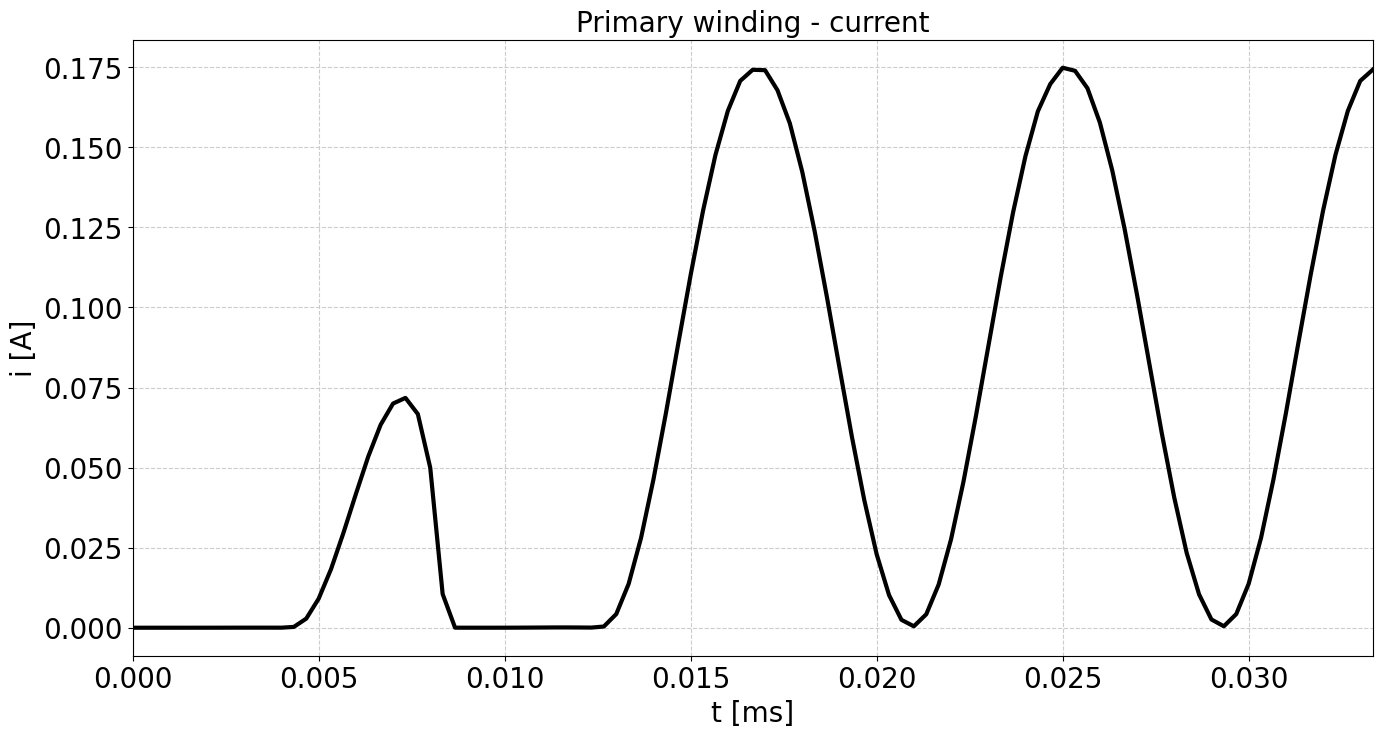

In [25]:
fig, ax = plt.subplots(figsize=(16, 8))
plt.plot(m_i_loss_time, m_i_loss, c='k', ls='-', lw=3, label='Commercial')
# plt.plot(e_a_time, e_a_priI, c='r', ls='-.', lw=3, label='Elmer')
ax.set_title('Primary winding - current', fontsize = 20)
ax.set_ylabel('i [A]', fontsize = 20)
ax.set_xlabel('t [ms]', fontsize = 20)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.grid(color=(0.8, 0.8, 0.8), linestyle='--', linewidth=.8)
# ax.legend(fontsize = 16, loc = 'lower right', fancybox=True, shadow=True)
ax.set_xlim([0,2/60])

print([m_i_Loss1, m_i_Loss2])
print([e_i_Loss1, e_i_Loss2])

[0.032629710530193624, 0.09847326408881751]
[0.100615295207, 0.1005099842148]


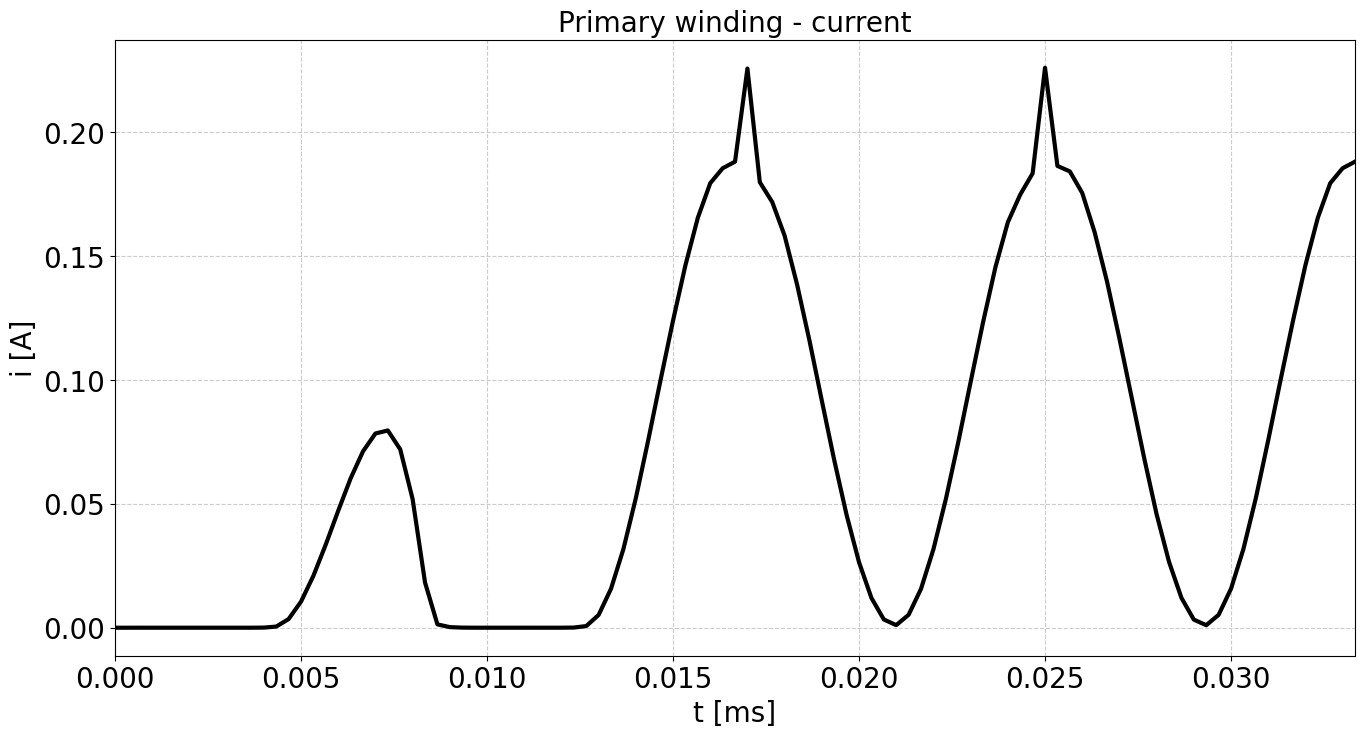

In [26]:
fig, ax = plt.subplots(figsize=(16, 8))
plt.plot(m_a_loss_time, m_a_loss, c='k', ls='-', lw=3, label='Commercial')
# plt.plot(e_a_time, e_a_priI, c='r', ls='-.', lw=3, label='Elmer')
ax.set_title('Primary winding - current', fontsize = 20)
ax.set_ylabel('i [A]', fontsize = 20)
ax.set_xlabel('t [ms]', fontsize = 20)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.grid(color=(0.8, 0.8, 0.8), linestyle='--', linewidth=.8)
# ax.legend(fontsize = 16, loc = 'lower right', fancybox=True, shadow=True)
ax.set_xlim([0,2/60])

print([m_a_Loss1, m_a_Loss2])
print([e_a_Loss1, e_a_Loss2])